# Question 4
## Out of the gendered words/phrases, which are the most common? 
## Count which one occurs most

In [25]:
'''
Approach:
1. Similar to counting the words that appear the most for job descriptions and job titles
2. Create a count for the gendered words in the job description
3. Create histogram or some sort of pie chart to display that
'''

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
import requests
import collections
from bs4 import BeautifulSoup
import geopandas as gpd
import pandas_bokeh
from shapely.geometry import Point, Polygon
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()

masculine_themed_wording = [
    "competitive",
    "dominate",
    "leader",
    "rock star",
    "rockstar",
    "guru",
    "ninja",
    "hacker",
    "superhero",
    "prove themselves",
    "analyze",
    "determine",
    "crush it",
    "world class",
    "superior",
    "ambitious",
    "aggressive"
]

s = "active adventurous aggress ambitio analy assert athlet autonom battle boast challeng champion compet confident courag decid decision decisive defend determin domina dominant driven fearless fight force greedy head-strong headstrong hierarch hostil impulsive independen individual intellect lead logic objective opinion outspoken persist principle reckless self-confiden self-relian self-sufficien selfconfiden selfrelian selfsufficien stubborn superior unreasonab"
masculine_themed_wording_updated = s.split()
print(masculine_themed_wording_updated)


states = ['AL',
    'AK',
    'AZ',
    'AR',
    'CA',
    'CO',
    'CT',
    'DE',
    'DC',
    'FL',
    'GA',
    'HI',
    'ID',
    'IL',
    'IN',
    'IA',
    'KS',
    'KY',
    'LA',
    'ME',
    'MD',
    'MA',
    'MI',
    'MN',
    'MS',
    'MO',
    'MT',
    'NE',
    'NV',
    'NH',
    'NJ',
    'NM',
    'NY',
    'NC',
    'ND',
    'OH',
    'OK',
    'OR',
    'PA',
    'RI',
    'SC',
    'SD',
    'TN',
    'TX',
    'UT',
    'VT',
    'VA',
    'WA',
    'WV',
    'WI',
    'WY' ]

total_jobs = 22000
jobs = pd.read_csv("dice_com-job_us_sample.csv")

#Create a column for the state
jobs["state"] = jobs["joblocation_address"].apply(lambda x: pd.Series(str(x).split(", ")[-1]))
jobs

Loading BokehJS ...

['active', 'adventurous', 'aggress', 'ambitio', 'analy', 'assert', 'athlet', 'autonom', 'battle', 'boast', 'challeng', 'champion', 'compet', 'confident', 'courag', 'decid', 'decision', 'decisive', 'defend', 'determin', 'domina', 'dominant', 'driven', 'fearless', 'fight', 'force', 'greedy', 'head-strong', 'headstrong', 'hierarch', 'hostil', 'impulsive', 'independen', 'individual', 'intellect', 'lead', 'logic', 'objective', 'opinion', 'outspoken', 'persist', 'principle', 'reckless', 'self-confiden', 'self-relian', 'self-sufficien', 'selfconfiden', 'selfrelian', 'selfsufficien', 'stubborn', 'superior', 'unreasonab']


,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id,state
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4,GA
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9,IL
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72,IL
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719,IL
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7,GA
5,https://www.dice.com/jobs/detail/SAP-FICO-Arch...,Yash Technologies,"Full Time, Permanant",We are looking for a Senior SAP FICO Architect...,Dice Id : 10111847,"Chicago, IL",SAP FICO Architect,2 weeks ago,Telecommuting not available|Travel required to...,NaN,"FICO, AR, AP, Asset Management, HAHA",e0ac9d926dda5e95162ef05adea7318c,IL
6,https://www.dice.com/jobs/detail/Network-Engin...,Noble1,"Full Time, Direct Hire",Network Engineer Job Description A Network Eng...,Dice Id : 90884761,"Atlanta, GA",Network Engineer,1 hour ago,Telecommuting not available|Travel not required,NaN,"Cisco, DNS, HTTP, Networking, Network Engineer...",e7e326053c586bd94e59f1fd74de4a1b,GA
7,https://www.dice.com/jobs/detail/Sr.-Web-Appli...,"Bluebeam Software, Inc.","Full Time, Full Time",Bluebeam is looking for talented sr. web devel...,Dice Id : 10110132,"Chicago, IL",Sr. Web Application Developer (Cloud Team) - C...,2 weeks ago,Telecommuting not available|Travel not required,NaN,".NET , C#, MVC, RESTful web services, HTTP, AW...",b0dadecf4c3c2beecb9c773ca11ecda4,IL
8,https://www.dice.com/jobs/detail/Front-End-Dev...,Genesis10,"Full Time, Direct Placement",This is a fulltime position for a Javascript d...,Dice Id : gentx001,"New York, NY",Front End Developer,7 hours ago,Telecommuting not available|Travel not required,NaN,"C++, Developer, Development, JavaScript, User ...",28f5e0c1cc3314813e674f0c32b04d1b,NY
9,https://www.dice.com/jobs/detail/Application-S...,"VanderHouwen & Associates, Inc.","C2H W2, Contract to hire",SummaryOur client is the leading provider of o...,Dice Id : vhassoc,"Seattle, WA",Application Support Engineer,7 hours ago,Telecommuting not available|Travel not required,NaN,(See Job Description),95c9127e2770172f454f3b83981eaa88,WA


In [26]:
'''
1. Take in the word from the updated list 
2. Check if word appears in the description
    - if it does, add it to the list
    - if NOT, do not add it to the list
3. After getting the jobs, get the exclusive jobs using list(set(list_name)) <-- these are indexes
4. With the job descriptions, loop through the list, add each of the columns that we want to its own list
5. Create the column and set it to that list
6. Get the states using the lambda function
'''

# Loops through the updated phrase list and appends to a list with the indexes of the jobs that have the phrases

job_index_list = []
for word in masculine_themed_wording_updated:
    print("Current word: ", word)
    x = jobs['jobdescription'].where(jobs['jobdescription'].str.find(word) > -1)
    #vals = jobs['jobdescription'].str.count(word)
    #print(word, " appears ", vals, " times")
    #print(x)
    for item, frame in x.iteritems():
        if pd.notnull(frame):
            job_index_list.append(item)
    
job_index_list_exec = list(set(job_index_list))
print("Length of original list: ", len(job_index_list))
print("Length of execlusive list: ", len(job_index_list_exec))

#print("with duplicates: ", job_index_list) 
print("without duplicates: ", job_index_list_exec)

# Create the dataframe called 'new_jobs' which contains the jobs that contain the phrases from the list
# In the cell BELOW is a function for this, there is just a block of code to run this

job_title_list = []
job_company_list = []
job_location_list = []
job_desc_list = []
for i in job_index_list_exec:
    job_title_list.append(jobs['jobtitle'].iloc[i])
    job_company_list.append(jobs['company'].iloc[i])
    job_location_list.append(jobs['state'].iloc[i])
    job_desc_list.append(jobs['jobdescription'].iloc[i])

new_jobs = pd.DataFrame(job_index_list_exec, index = job_index_list_exec, columns = ["Job Number"])
new_jobs["Job Title"] = job_title_list
new_jobs["Company"] = job_company_list
new_jobs["Location"] = job_location_list
new_jobs["Description"] = job_desc_list

new_jobs


        
        


Current word:  active
Current word:  adventurous
Current word:  aggress
Current word:  ambitio
Current word:  analy
Current word:  assert
Current word:  athlet
Current word:  autonom
Current word:  battle
Current word:  boast
Current word:  challeng
Current word:  champion
Current word:  compet
Current word:  confident
Current word:  courag
Current word:  decid
Current word:  decision
Current word:  decisive
Current word:  defend
Current word:  determin
Current word:  domina
Current word:  dominant
Current word:  driven
Current word:  fearless
Current word:  fight
Current word:  force
Current word:  greedy
Current word:  head-strong
Current word:  headstrong
Current word:  hierarch
Current word:  hostil
Current word:  impulsive
Current word:  independen
Current word:  individual
Current word:  intellect
Current word:  lead
Current word:  logic
Current word:  objective
Current word:  opinion
Current word:  outspoken
Current word:  persist
Current word:  principle
Current word:  reckless

,Job Number,Job Title,Company,Location,Description
0,0,AUTOMATION TEST ENGINEER,"Digital Intelligence Systems, LLC",GA,Looking for Selenium engineers...must have sol...
1,1,Information Security Engineer,University of Chicago/IT Services,IL,The University of Chicago has a rapidly growin...
2,2,Business Solutions Architect,"Galaxy Systems, Inc.",IL,"GalaxE.SolutionsEvery day, our solutions affec..."
3,3,"Java Developer (mid level)- FT- GREAT culture,...",TransTech LLC,IL,Java DeveloperFull-time/direct-hireBolingbrook...
6,6,Network Engineer,Noble1,GA,Network Engineer Job Description A Network Eng...
9,9,Application Support Engineer,"VanderHouwen & Associates, Inc.",WA,SummaryOur client is the leading provider of o...
10,10,OpenStack Engineer - 12185,"Maxonic, Inc.",CA,JOB DESCRIPTION:As a senior member of the team...
11,11,9001 Data Security Administrator - Unix & IAM,CSI (Consultant Specialists Inc.),CO,"Must have skills: UNIX, IAM (Identity Access M..."
12,12,Software Engineer Manager,"VanderHouwen & Associates, Inc.",OR,VanderHouwen has more jobs you may like! Find...
13,13,Sales Engineer - Los Angles,Genesis10,CA,Genesis10 is currently seeking a Sales Enginee...


In [ ]:
dataframe_maker(job_index_list_exec)
def dataframe_maker (job_index_list_exec):
    job_title_list = []
    job_company_list = []
    job_location_list = []
    job_desc_list = []
    for i in job_index_list_exec:
        job_title_list.append(jobs['jobtitle'].iloc[i])
        job_company_list.append(jobs['company'].iloc[i])
        job_location_list.append(jobs['state'].iloc[i])
        job_desc_list.append(jobs['jobdescription'].iloc[i])
        

In [4]:
'''
Approach:
1. Similar to counting the words that appear the most for job descriptions and job titles
2. Create a count for the gendered words in the job description
3. Create histogram or some sort of pie chart to display that
'''

# Returns the index it's found when using str.find


# "prove themselves","analyze","determine",
# "crush it", "world class", "superior", "ambitious", "aggressive",


# Prints the job description for any job that contains "competitive" in the description
# FOR THE STRING COMPETITIVE
print("Competitive \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("competitive") > -1)
#print(type(x))
#print(x)

count1 = 0
arr = []

# Gets count of jobs that uses that specific string in job description
for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr.append(item)
        count1 += 1
#print("length of array", len(arr))
#print("count using COMPETITIVE: ", count)
print("% that uses competitive", (count1/total_jobs) * 100)

# This loop will get the POSITION of the jobs that contain the string
# when i == value contained in arr, then print the job title
# then store into data frame
for i in arr:
    print(jobs["jobtitle"].iloc[i])
    #print(0)

    
    
    
# FOR THE STRING DOMINATE
print()
print("Dominate \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("dominate") > -1)
count2 = 0
arr2 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr2.append(item)
        count2 += 1
print("% that uses dominate", (count2/total_jobs) * 100)
        
for i in arr2:
    print(jobs['jobtitle'].iloc[i])

    
# FOR THE STRING LEADER
print()
print("Leader \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("leader") > -1)
count3 = 0
arr3 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr3.append(item)
        count3 += 1
print("% that uses leader", (count3/total_jobs) * 100)
for i in arr3:
    print(jobs['jobtitle'].iloc[i])
    
# FOR THE STRING rock star
print()
print("Rock star \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("rock star") > -1)
count4 = 0
arr4 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr4.append(item)
        count4 += 1
print("% that uses rock star", (count4/total_jobs) * 100)
for i in arr4:
    print(jobs['jobtitle'].iloc[i])

# FOR THE STRING rockstar
print()
print("Rockstar \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("rockstar") > -1)
count5 = 0
arr5 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr5.append(item)
        count5 += 1
print("% that uses rockstar", (count5/total_jobs) * 100)
for i in arr5:
    print(jobs['jobtitle'].iloc[i])
    
# FOR THE STRING guru
print()
print("Guru \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("guru") > -1)
count6 = 0
arr6 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr6.append(item)
        count6 += 1
print("% that uses guru", (count6/total_jobs) * 100)

for i in arr6:
    print(jobs['jobtitle'].iloc[i])
    
# FOR THE STRING ninja
print()
print("Ninja \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("ninja") > -1)
count7 = 0
arr7 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr7.append(item)
        count7 += 1

print("% that uses ninja", (count7/total_jobs) * 100)

for i in arr7:
    print(jobs['jobtitle'].iloc[i])

# FOR THE STRING hacker
print()
print("Hacker \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("hacker") > -1)
count8 = 0
arr8 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr8.append(item)
        count8 += 1
print("% that uses hacker", (count8/total_jobs) * 100)
        
for i in arr8:
    print(jobs['jobtitle'].iloc[i])

# FOR THE STRING superhero
print()
print("Superhero \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("superhero") > -1)
count9 = 0
arr9 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr9.append(item)
        count9 += 1
print("% that uses superhero", (count9/total_jobs) * 100)
for i in arr9:
    print(jobs['jobtitle'].iloc[i])
    

# FOR THE STRING prove themselves
print()
print("Prove themselves \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("prove themselves") > -1)
count10 = 0
arr10 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr10.append(item)
        count10 += 1
print("% that uses prove themselves", (count10/total_jobs) * 100)
for i in arr10:
    print(jobs['jobtitle'].iloc[i])


# FOR THE STRING analyze
print()
print("Analyze \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("analyze") > -1)
count11 = 0
arr11 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr11.append(item)
        count11 += 1
print("% that uses analyze", (count11/total_jobs) * 100)
for i in arr11:
    print(jobs['jobtitle'].iloc[i])

# FOR THE STRING determine
print()
print("Determine \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("determine") > -1)
count12 = 0
arr12 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr12.append(item)
        count12 += 1
print("% that uses determine", (count12/total_jobs) * 100)
for i in arr12:
    print(jobs['jobtitle'].iloc[i])
    

# FOR THE STRING crush it
print()
print("Crush it \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("crush it") > -1)
count13 = 0
arr13 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr13.append(item)
        coun13 += 1
print("% that uses crush it", (count13/total_jobs) * 100)
if count13 != 0:
    for i in arr13:
        print(jobs['jobtitle'].iloc[i])
print("count 13: ", count13)

print()
print("World Class \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("world class") > -1)
count14 = 0
arr14 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr14.append(item)
        count14 += 1
print("% that uses world class", (count14/total_jobs) * 100)
for i in arr14:
    print(jobs['jobtitle'].iloc[i])
    

print("count14: ", count14)

# FOR THE STRING superior
print()
print("Superior \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("superior") > -1)
count15 = 0
arr15 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr15.append(item)
        count15 += 1
print("% that uses superior", (count15/total_jobs) * 100)
for i in arr15:
    print(jobs['jobtitle'].iloc[i])  


print("count15: ", count15)




 # FOR THE STRING ambitious 
print()
print("Ambitious \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("ambitious") > -1)
count16 = 0
arr16 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr16.append(item)
        count16 += 1
print("% that uses ambitious", (count16/total_jobs) * 100)
for i in arr16:
    print(jobs['jobtitle'].iloc[i]) 
    
    
print("count16: ", count16)

# FOR THE STRING aggressive 
print()
print("Aggressive \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("aggressive") > -1)
count17 = 0
arr17 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr17.append(item)
        count17 += 1
print("% that uses aggressive", (count17/total_jobs) * 100)
# print(arr17)
for i in arr17:
    print(jobs['jobtitle'].iloc[i])

print("count17: ", count17)

Competitive 

% that uses competitive 7.122727272727272
1001 Selenium Automation testing
Jr Business Analysts
Business Systems Analyst
Account Manager
Business Development Manager
IT Project Manager (Mobile Apps)
Manager - QA, Automation, Management, Team Development, SDLC, Agile,SOA
IT Buyer
Entry Level Business Systems Analyst
Software Engineer, Hadoop
Senior Consultant w/ TOP SECRET CLEARANCE
Hybrid Mobile Developer - HTML5, CSS3, AngularJS
Insurance Consulting Leader
Senior Back End Developer - Python, Big Data Processing
Solution Architect, Master Data Management (MDM) - East
Enterprise Information Management (EIM) Principal Consultant (Remote)
Lead Android Developer - Java, Android SDK, Android
MBA Intern - Enterprise Market Strategy
Java Lead / Java Developer with spring
Senior Developer - HEAVILYFunded, Revolutionary Biotech Co! RELO
Platform Engineer - AWS, DevOps, PHP
Software Engineer - Full Stack Cloud product development
Oracle ERP Cloud Technical (Financials/SCM)
Senior F

Senior Applications Engineer
Director Of Engineering- AI/Machine Learning/NLP
Senior Product Line Management -0314
Front End Web Developer
Big Data Analytics Engineer
Senior Software Engineer/Architect
Senior Java Software Engineer
Senior Software Engineer, Android development
Big Data Developer
Sr Software Engineering Manager - Leading BioTech Firm - San Carlos
Director, IT Compliance Solutions Fraud Solutions
Peoplesoft Application Architect - 12374
Business Development Manager- Cloud and Infrastructure services
Oracle Development Engineer
Desktop Support with Mac Experience
Sr Manager, Site & Content Experience
Sr. Android Developer
IT Analyst II -Network Administrator
Mobile QA Tester (Local Candidates Only)
Maps Test Engineer
SYSTEMS SOFTWARE SPECIALIST III (TECHNICAL)
Microsoft Azure Consultant
Senior Build & Release Engineer
Senior Networking Engineer
Cognos BI Analyst/ Developer - 12384
DevOps Engineer
Automotive Account Manager & Solution Sales
DevOps Engineer
Big Machines CPQ

Network Test Engineer - 12602
Associate Director, Business Intelligence- 16001594
Solution Architect
Engineering Manager
Product Manager - BHJOB2052_12749
Senior Software Engineer
Ecommerce Technical Manager
EPL Claims Trainee
Help Desk Team Lead
Director, Client Support Services
PL/SQL Developer
Agile Coach
Data Engineer
Senior Controls Engineer-Technical Lead
Disaster Recovery Specialist
Oracle Data Integration (ODI) Consultant
Agile Program Manager
Senior Oracle Financial Functional
Urgent- Remote Integration Architect, CT
VP of Business Development (REMOTE)
SAP Business Objects Developer and Consultant
IT Project Manager
Many Exciting Career Opportunities Are Currently Available At Aries Systems Corporation
DEEP LEARNING DATA ARCHITECTURE SME, start up opportunity
Senior Software Development Engineer
QA Engineer
Software Engineer
Sr. Manufacturing Engineer - Automation - Robotics
Workday Functional Sr Consultant - Sr Solution Engineer - USDC
Associate Director, Information Security

Oracle SOA 12C Expert
Principal Security Consultant - $250K+
Lead App (.Net) Developer
Coldfusion Team Lead long term project you build the team
Business Analyst
Performance Engineer
IT Consolidation and Migration Planning Consultant
Lead Security Analyst
Senior C++ Developer
Success Factors Recruitment Suit SME
Training Representative 2
Performance and Scalability Tester
PMO/Project Manager
Quality Process Architect
Healthcare Program Manager (Sales )
Agile Coach
Drupal Lead
Business Analyst - Identity and Access Management
Mechanical Engineer
SAP FICO Business Systems Manager
Automation Quality Analyst
IT Audit Manager II - SecureWorks
Test Engineer
JD Edwards Consultant - Sales and Distribution
Sr. SAS Developer
Solutions Architect
SAP PP - Senior Consultant (Supply Chain Capability)
SAP TM (Transportation Management) - Senior Consultant (Supply Chain Capability)
.NET Developer - C#, WPF, Subversion Systems!
SAP Open Text with VIM - Manager (Technology Capability)
Sr. .Net Solution 

Senior Solutions Architect/Sales Consultant
Vice President of Managed Services.
Senior Information Security Officer (SISO)
SENIOR JAVA DEVELOPER
Business Analyst - IT - Manufacturing, MES, JIT, Shop Floor
SQL Developer
Release Automation / DevOps Engineer
Dot Net
Dot Net
Application Implementation Manager / Consultant
Sr. Network Architect
VP of Tech Engineering
Salesforce Lead Architect
Senior Systems Analyst
SAP Business Solutions Manager - FICO / HR
Project Management and Planning Director, Information Technology
Technical Lead - C# and Dot Net
Java Technical Architect ALL NEW!
SAP Ariba Consultant
SAP Ariba Consultant
Cloud Director (IaaS, PaaS, SaaS)
DevOps Engineer - Infrastructure
JD Edwards Project Manager
Quality Assurance Analyst/Testing Enginner
PC Configuration and Implementation Engineer
.Net Developer
Project Coordinator
Vice President of Managed Services.
Sr. Project Manager
Big Data Engineer
Requirements Engineer
Junior Project Manager
Principal Application Security Con

IT Training Manager
Vice President of Global Sales
Sr. Business System Analyst - 12386
Data Management Lead, Process Development Engineering
Sr Java Engineer : Direct Client San Francisco CA
LivIT Service Management Office (SMO) Lead
Sr. ABAP EDI Contractor - Santa Clara, CA
Big Machines CPQ Solutions Architect
SOC/Security Analyst
Lead JS UI Developer with Growing Startup
Senior Web Developer
Sr Software Engineer-Search Tools
Technical Operations Manager
Senior Pega Consultant - Multiple Locations
Big Data Practice Director
Senior UI Developer
Sales Engineer
QA
Principal Digital Product Manager
UX Designer
Security Engineer
Network Security Engineer
Services Product Manager
Senior Integration Architect ICC
Technical JavaScript Lead - Leading Hospitality SaaS Company - SF
Sr. Database Architect
Sr. QA Automation Engineer
Project /Program Manager
Data Analyst I
Engineering Manager - Website Optimization
Full-stack Engineer - Java
Business Development Manager (BDM)
Technical Program/ Pro

% that uses superhero 0.004545454545454545
Help Desk Heroes

Prove themselves 

% that uses prove themselves 0.04090909090909091
Strong Mid-Level PostgreSQL DBA
JAVA Engineer
Help Desk Tech Support Analyst - Houston, TX
Help Desk Analyst (Call Center)
Technical Support Analyst
(Tivoli Storage Manager) Backup Engineer, No corp corp
Service Desk Analyst
Technical Support
Senior Backup Engineer

Analyze 

% that uses analyze 9.3
Application Support Engineer
USB Validation Engineer
Sr. Software Storage Engineer
Software Development Engineer, Big Data
Product QA Engineer
System Support Administrator
Business Intelligence Development Manager
Sr. EDI Business Analyst
Scientific Software Specialist and BA
Senior Product Manager, Pricing - Fulfillment By Amazon
Information Technology Architect
Auditor Analyst
COBOL Developer / Programmer
Project Manager
BA/ QA Tester
Treasury Associate
Network Engineer/ Architect
Data Architect - III
Sr Network Engineer
Linux Administrator (Scripting Must)
Syst

Architecture Technology director
Senior SAP FICO Analyst
Senior Business Analyst
Security Analyst CEH
Business Analyst
Junior Sharepoint Developer
Java Software Engineer Developer Programmer/Analyst - G
Business Intelligence Business Analyst / Data Architect
Technical/Data Analyst
Citrix Admin
Systems Analyst - RSA Archer Admin
Data C++ Java Software Engineer Developer Programmer/Analyst - G
Project Controls Manager
Network Security Specialist
Software Engineer II
Infrastructure Engineer, Senior Specialist - Storage Services
Senior Network Engineer
DevOps Engineer III
OFSAA Consultants (Technical/ Functional)
BUSINESS ANALYST
Sr. IT Engineer/ Sr. Linux Engineer/Sr. Sytem Engineer
helpdesk/ Desktop Support
Business Analyst
Java/Angular JS Developer
Lead Security Analyst
Jr. IT Engineer/ Jr. Linux Engineer/Jr.Sytem Engineer
Senior C++ Developer
Performance and Scalability Tester
Sr. Business Intelligence Analyst
Automation Quality Analyst
Test Engineer
Embedded Developer_MI OR GA
Test Le

ArcSight / SIEM Engineer/Admin
Database Administrator w/Top Secret
Senior Network Engineer
Technical Writer
Sr. Security Engineer
Microsoft Dynamics CRM developer New Jersey (face to face)
Cobol Developer with Apex Systems
Vantage-One Developer
Sr. Linux Admin/Devops Engineer
Business Systems Analyst
Software Engineer
Amdocs Consultant
Headend Engineer
Identity and Access management specialist
Product Support Specialist
Forensic Network Analyst
IVR Developer - Alpharetta or Middle town(NJ)
Business Analyst
Role: Product Owner (NOT Project Manager)
SAP Analyst - FI
Network Systems Administrator (Linux)
Technical Project Manager / Scrum Master
Identity and Access Management Senior / IAM
Siebel / Salesforce BA (Multiple Postions)
Java Developer
Technical Service Representative
Sr. Software Engineer - Java - New program (DC/Reston)
Oracle SOA Developer
IT Release Manager
Full Stack Developer-Angular
.NET Technical consultant
Business Analyst
.Net Developer
Lead PeopleSoft HCM Analyst
Datab

LAWSON DEVELOPER
Technical Architect-Sitecore
Systems Administrator / Citrix
Network Support Engineer
Senior Business Analyst w/ Media
Japanese Speaker - KYC Analyst (Banking, Jersey City, Contract)
DataStage Developer
Business Systems Analyst
Jr. Change Management Analyst
Infrastructure Architect (Office365)
Systems Administrator
Director of IT Enterprise Applications (IT Computer Systems Manager,
Technical Project Leader
Information Security Administrator/Analyst
Java Developer
Project Delivery Manager / Development Manager
Senior/Lead Operations Analyst
Project Coordinator for IT Training effort
Associate Procurement Analyst
Oracle Supply Chain Functional Consultant
Cybersecurity Research Engineer IV
Oracle Soa BPM Developer
Infrastructure Lead
Senior Data Analyst Capital Markets
Network Professional
Associate Director, Enterprise Messaging
Senior Business Intelligence Developer
Systems Engineer
Senior SAN Specialist
Technical Support Specialist
Systems Developer: Bloomingdale's, Ne

% that uses world class 0.7181818181818181
Frontend/UI Developer
Frontend/UI Developer
Application Support / Data Analyst
Mobile iOS Developer
Systems Engineer- Managed Services
Project Manager - Data Analytics
Java Software Engineer
Android Developer
Web Developer
Internal Audit Senior Associate
DevOps/Azure Release Engineer
Director, Quality Engineering
Full Stack JavaScript (node) Developer/Architect
Sr Python Developer and Python Architect
Sr .NET Developer - Azure/MVC/WebAPI/Bootstrap
SQL Programmer/Analyst
Software Engineer
Art Director, Amazon Fashion
Software Development Engineer
Sr. Software Engineer
Software Development Engineer
Software Development Engineer
Sr. Front-End / Angular Web Developer
Sr. Software Engineer, The Huffington Post
Sr. Software Engineer, The Huffington Post
SAP HANA Instructor
Director of Product Engineering and Innovation
Sr. Software Development Engineer - (OPC/RET)
Developer ( C#, JavaScript, Java ) 100-130
MDM Program Manager (BI/DM)
Sr Architect, S

% that uses ambitious 0.37727272727272726
9001 Data Security Administrator - Unix & IAM
Senior Sales Engineer -Pre-sales- Top Rated Boston Tech Company!
Software Architect Team Lead
Senior Software Engineer, Automation
Inside Sales & Customer Success Representative
CMS Technical Lead/Project Manager
Senior Database Developer
Senior Software Engineer - Financial Services
Business Development Manager
Sales Executive - (Hunter)
Principal Software Engineer - Distributed Systems
Senior Manager, Technical Program Management
Software Development Leader EC2 Networking
Build / Release Engineer
Senior Technical Program Manager - Quality Tools Team
Consumer Web Hosting Manager
Senior Technical Program Manager - Continuous Delivery
Technical Recruiter
Build / Release Engineer
Big Data Cloud Staff Engineer - WA
(4223) Build Release Engineer - Redmond WA - Only Local and W2
Sr. Web UI Software Engineer - NO Corp2Corp
Nortel Engineer - Tier III
Desktop Support
DevOps Engineer
QA Engineer - MMD
Senior

In [5]:
complete_job_list = arr + arr2 + arr3 + arr4 + arr5 + arr6 + arr7 + arr8 + arr9 + arr10 + arr11 + arr12 + arr13 + arr14 + arr15 + arr16 + arr17

# ^^ Remove duplicates from this list by converting to a set then back to a list
complete_job_list_exclusives = list(set(complete_job_list))
print("Without duplicates")
print(complete_job_list_exclusives)
print(len(complete_job_list_exclusives))

job_title_list = []
for i in complete_job_list_exclusives:
    job_title_list.append(jobs['jobtitle'].iloc[i])

job_desc_list = []
for i in complete_job_list_exclusives:
    job_desc_list.append(jobs['jobdescription'].iloc[i])
    
job_location_list = []
for i in complete_job_list_exclusives:
    job_location_list.append(jobs['joblocation_address'].iloc[i])


# Create a dataframe that has job #, job title, job description and location
dataframe = pd.DataFrame(complete_job_list_exclusives, index = complete_job_list_exclusives, columns = ["Job Number"])
dataframe["Title"] = job_title_list
dataframe["Description"] = job_desc_list
dataframe["Location"] = job_location_list
dataframe["State"] = dataframe["Location"].apply(lambda x: pd.Series(str(x).split(", ")[-1]))

# Remove jobs that are not in US states
drop_list = []
for state in dataframe['State']:
    if state not in states:
        drop_list.append(state)
drop_list

state_count = dataframe['State'].value_counts()
print(type(state_count))
state_count = state_count.drop(labels = drop_list)
state_count = state_count.to_frame()
state_count

Without duplicates
[2, 9, 10, 11, 13, 15, 19, 20, 24, 25, 26, 27, 29, 30, 35, 38, 40, 42, 45, 46, 49, 50, 51, 52, 56, 57, 60, 63, 68, 69, 73, 76, 78, 81, 86, 88, 89, 92, 96, 98, 99, 107, 108, 109, 113, 114, 115, 116, 118, 120, 123, 125, 127, 129, 130, 132, 133, 136, 137, 138, 140, 142, 143, 144, 146, 149, 152, 162, 164, 166, 168, 169, 170, 172, 174, 177, 179, 181, 183, 185, 189, 192, 195, 201, 202, 206, 207, 209, 210, 211, 214, 215, 219, 226, 228, 229, 230, 232, 234, 235, 238, 240, 245, 247, 250, 254, 259, 260, 265, 267, 268, 270, 274, 277, 282, 287, 289, 290, 291, 293, 298, 299, 303, 306, 307, 308, 310, 312, 314, 315, 319, 320, 321, 322, 323, 326, 327, 328, 331, 332, 333, 335, 338, 339, 340, 345, 347, 349, 351, 352, 354, 355, 362, 363, 366, 368, 372, 373, 376, 378, 382, 383, 385, 387, 389, 390, 391, 396, 398, 401, 402, 403, 407, 408, 409, 411, 412, 415, 416, 419, 421, 426, 429, 433, 435, 436, 439, 443, 445, 447, 448, 449, 450, 454, 455, 457, 459, 460, 461, 462, 463, 464, 469, 470, 473

<class 'pandas.core.series.Series'>


,State
CA,1551
TX,769
NY,739
GA,718
NJ,627
WA,527
MA,519
VA,304
PA,284
CT,279


In [6]:
   
#Prints the percentages for each word
'''
    "crush it",
    "world class",
    "superior",
    "ambitious",
    "aggressive"
'''
print()
print("PERCENTAGE")
print("% that uses competitive", (count1/total_jobs) * 100)
print("% that uses dominate", (count2/total_jobs) * 100)
print("% that uses leader", (count3/total_jobs) * 100)
print("% that uses rock star", (count4/total_jobs) * 100)
print("% that uses rockstar", (count5/total_jobs) * 100)
print("% that uses guru", (count6/total_jobs) * 100)
print("% that uses ninja", (count7/total_jobs) * 100)
print("% that uses hacker", (count8/total_jobs) * 100)
print("% that uses superhero", (count9/total_jobs) * 100)
print("% that uses prove themselves", (count10/total_jobs) * 100)
print("% that uses analyze", (count11/total_jobs) * 100)
print("% that uses determine", (count12/total_jobs) * 100)
print("% that uses crush it", (count13/total_jobs) * 100)
print("% that uses world class", (count14/total_jobs) * 100)
print("% that uses superior", (count15/total_jobs) * 100)
print("% that uses ambituous", (count16/total_jobs) * 100)
print("% that uses aggressive", (count17/total_jobs) * 100)

print()
print("NUMBER OF JOBS WORD OCCURS")
print("# of jobs that uses competitive: ", count1)
print("# of jobs that uses dominate: ", count2)
print("# of jobs that uses leader: ", count3)
print("# of jobs that uses rock star: ", count4)
print("# of jobs that uses rockstar: ", count5)
print("# of jobs that uses guru: ", count6)
print("# of jobs that uses ninja: ", count7)
print("# of jobs that uses hacker: ", count8)
print("# of jobs that uses superhero: ", count9)
print("# of jobs that uses prove themselves: ", count10)
print("# of jobs that uses analyze: ", count11)
print("# of jobs that uses determine: ", count12)
print("# of jobs that uses crush it: ", count13)
print("# of jobs that uses world class: ", count14)
print("# of jobs that uses superior: ", count15)
print("# of jobs that uses ambituous: ", count16)
print("# of jobs that uses aggressive: ", count17)
 


PERCENTAGE
% that uses competitive 7.122727272727272
% that uses dominate 0.045454545454545456
% that uses leader 20.79090909090909
% that uses rock star 0.1181818181818182
% that uses rockstar 0.03181818181818182
% that uses guru 0.17272727272727273
% that uses ninja 0.03181818181818182
% that uses hacker 0.1090909090909091
% that uses superhero 0.004545454545454545
% that uses prove themselves 0.04090909090909091
% that uses analyze 9.3
% that uses determine 5.613636363636363
% that uses crush it 0.0
% that uses world class 0.7181818181818181
% that uses superior 1.7727272727272727
% that uses ambituous 0.37727272727272726
% that uses aggressive 1.0636363636363637

NUMBER OF JOBS WORD OCCURS
# of jobs that uses competitive:  1567
# of jobs that uses dominate:  10
# of jobs that uses leader:  4574
# of jobs that uses rock star:  26
# of jobs that uses rockstar:  7
# of jobs that uses guru:  38
# of jobs that uses ninja:  7
# of jobs that uses hacker:  24
# of jobs that uses superhero

# Results
## We see the breakdown of the words from the array and we can see the percentages of jobs that contain these words in job descriptions
## Using this data we can create a sort of visualization

In [7]:
arr_nums = []
arr_nums.append(count1)
arr_nums.append(count2)
arr_nums.append(count3)
arr_nums.append(count4)
arr_nums.append(count5)
arr_nums.append(count6)
arr_nums.append(count7)
arr_nums.append(count8)
arr_nums.append(count9)
arr_nums.append(count10)
arr_nums.append(count11)
arr_nums.append(count12)
arr_nums.append(count13)
arr_nums.append(count14)
arr_nums.append(count15)
arr_nums.append(count16)
arr_nums.append(count17)

print(arr_nums)
total_junk = count1 + count2 + count3 + count4 + count5 + count6 + count7 + count8 + count9 + count10 + count11 + count12+ count13+ count14+ count15+ count16+ count17
total_junk

[1567, 10, 4574, 26, 7, 38, 7, 24, 1, 9, 2046, 1235, 0, 158, 390, 83, 234]


10409

In [8]:
series_nums = pd.Series(arr_nums, index=masculine_themed_wording)
series_nums

competitive         1567
dominate              10
leader              4574
rock star             26
rockstar               7
guru                  38
ninja                  7
hacker                24
superhero              1
prove themselves       9
analyze             2046
determine           1235
crush it               0
world class          158
superior             390
ambitious             83
aggressive           234
dtype: int64

Text(0.5, 0, 'Keywords')

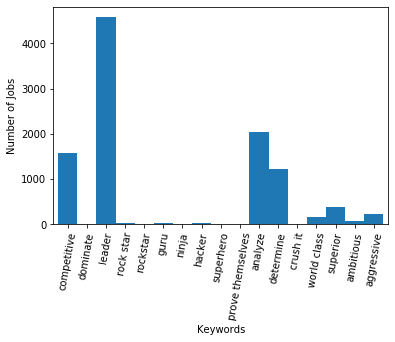

In [9]:
graph = series_nums.plot.bar(rot = 80, width = 1)
graph.set_ylabel("Number of Jobs")
graph.set_xlabel("Keywords")

In [10]:
dataframe

,Job Number,Title,Description,Location,State
2,2,Business Solutions Architect,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",IL
9,9,Application Support Engineer,SummaryOur client is the leading provider of o...,"Seattle, WA",WA
10,10,OpenStack Engineer - 12185,JOB DESCRIPTION:As a senior member of the team...,"Sunnyvale, CA",CA
11,11,9001 Data Security Administrator - Unix & IAM,"Must have skills: UNIX, IAM (Identity Access M...","Highlands Ranch, CO",CO
13,13,Sales Engineer - Los Angles,Genesis10 is currently seeking a Sales Enginee...,"Los Angeles, CA",CA
15,15,Windows System Administrator,Windows Systems Administrator The Windows Syst...,"Las Vegas, NV",NV
19,19,"Java Architect - Denver, CO - Fulltime",Our client in the healthcare software industry...,"Denver, CO",CO
20,20,IT Business Analyst,Genesis10 is looking for a Business Analyst fo...,"Sandy Springs, GA",GA
24,24,USB Validation Engineer,VanderHouwen has more jobs you may like! Find...,"Austin, TX",TX
25,25,Senior Product Manager,Do you want a chance to directly improve the c...,"Seattle, WA",WA


In [53]:
# Now with the words found here, find how many times they appear by state
# Add column to the dataframe that contains the state only
# After finding by state, use that data to do word stemming and include that as a count towards the phrase
# appearance.
# Ex. leading and lead = appears 2 times.

from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import*
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

stemmer = SnowballStemmer("english")

# search through dataframe, get the jobs for state 

# for state in states:
    
#     state_count = dataframe['State'].value_counts()
#     count = 0
#     big_word = ""
#     state_dict = {}
    
#     temp = dataframe.loc[dataframe['State'] == state]
    
#     for word in masculine_themed_wording:
        
#         #print("Now checking the word: ", word)
#         word_count = temp['Description'].str.contains(word).sum()
#         #print("Word count for ", word, " : ", word_count)
        
#         if word_count > count:
#             count = word_count
#             big_word = word
            
#             #print("State: ", state)
#             #print("Big word: ", big_word)
#             #print("Word count for: ", state, " : ", word_count)
            
#     print("State end: ", state)
#     print("Big word end: ", big_word) 
#     print("Word count end: ", count)
    

# #dataframe_state_index = pd.DataFrame(complete_job_list_exclusives, index = dataframe['State'], columns = ["Job Number"])
# #dataframe_state_index

for state in dataframe['State']:
    #print(state)
    if state not in states:
        drop_list.append(state)
        #print(drop_list)


# Creates the counts for each state then drops rows that aren't in the state list
state_count = dataframe['State'].value_counts()
state_count = state_count.drop(labels = drop_list)

for word in s_list:
    if stemmer.stem(word) not in s_list:
        s_list.append(stemmer.stem(word))

s_list2 = list(set(s_list))
print(s_list2)
print(len(s_list2))


state_dict = {}
# Redo using Snowball NLTK (Stemming)
for state in states:
    
    count = 0
    big_word = ""
    
    
    temp = dataframe.loc[dataframe['State'] == state]
    
    for word in masculine_themed_wording:
        
        #print("Now checking the word: ", word)
        word_count = temp['Description'].str.contains(word).sum()
        #print("Word count for ", word, " : ", word_count)
        
        if word_count > count:
            count = word_count
            big_word = word
            
            #print("State: ", state)
            #print("Big word: ", big_word)
            #print("Word count for: ", state, " : ", word_count)
            
    print("State end: ", state)
    print("Big word end: ", big_word) 
    print("Word count end: ", count)
   # print("Total Jobs in State: ", state_count)
    state_dict[state] = (big_word, count)
print(state_dict)

state_df_from_dict = pd.DataFrame.from_dict(state_dict, orient = 'index', columns = ['Phrase', 'Number'])
state_df_from_dict


['defend', 'rockstar', 'principl', 'rock star', 'guru', 'decision', 'outspoken', 'boast', 'impuls', 'fearless', 'world class', 'selfrelian', 'self-relian', 'confid', 'self-confiden', 'leader', 'active', 'decis', 'autonom', 'decisive', 'compet', 'force', 'determin', 'individual', 'intellect', 'ninja', 'decid', 'superior', 'anali', 'fight', 'individu', 'challeng', 'crush it', 'greedi', 'ambiti', 'athlet', 'assert', 'headstrong', 'analy', 'dominant', 'driven', 'superhero', 'forc', 'independen', 'objective', 'selfconfiden', 'confident', 'hostil', 'deci', 'unreasonab', 'adventurous', 'prove themselv', 'principle', 'self-sufficien', 'battl', 'champion', 'persist', 'lead', 'domina', 'opinion', 'hierarch', 'domin', 'ambitio', 'stubborn', 'activ', 'object', 'head-strong', 'logic', 'analyz', 'greedy', 'impulsive', 'hacker', 'selfsufficien', 'competit', 'battle', 'courag', 'reckless', 'aggress', 'adventur', 'impul']
80
State end:  AL
Big word end:  leader
Word count end:  11
State end:  AK
Big wo

,Phrase,Number
AL,leader,11
AK,leader,1
AZ,leader,23
AR,leader,1
CA,leader,858
CO,leader,47
CT,leader,158
DE,leader,6
DC,leader,78
FL,leader,65


In [12]:
# NLTK WORKS!!!
# tutorial from https://pythonspot.com/nltk-stemming/

from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

stemmer = SnowballStemmer("english")
words = ["running", "runner", "run", 'engineer']
print(masculine_themed_wording)

ps = PorterStemmer()
ls = LancasterStemmer()
for word in masculine_themed_wording:
    print("ps: ", ps.stem(word))
    print("ls: ", ls.stem(word))

['competitive', 'dominate', 'leader', 'rock star', 'rockstar', 'guru', 'ninja', 'hacker', 'superhero', 'prove themselves', 'analyze', 'determine', 'crush it', 'world class', 'superior', 'ambitious', 'aggressive', 'competit', 'domin', 'prove themselv', 'analyz', 'determin', 'ambiti', 'aggress']
ps:  competit
ls:  competit
ps:  domin
ls:  domin
ps:  leader
ls:  lead
ps:  rock star
ls:  rock star
ps:  rockstar
ls:  rockst
ps:  guru
ls:  guru
ps:  ninja
ls:  ninj
ps:  hacker
ls:  hack
ps:  superhero
ls:  superhero
ps:  prove themselv
ls:  prove themselves
ps:  analyz
ls:  analys
ps:  determin
ls:  determin
ps:  crush it
ls:  crush it
ps:  world class
ls:  world class
ps:  superior
ls:  supery
ps:  ambiti
ls:  amb
ps:  aggress
ls:  aggress
ps:  competit
ls:  competit
ps:  domin
ls:  domin
ps:  prove themselv
ls:  prove themselv
ps:  analyz
ls:  analys
ps:  determin
ls:  determin
ps:  ambiti
ls:  ambit
ps:  aggress
ls:  aggress


In [36]:
# Use NLTK and loop through the masculine words and d
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


# Use the newly found data with word stemming and find it by state here too similar to Q3
desc = jobs['jobdescription']
desc

masculine_themed_wording

# Use the masculine themed wording and the job position to 

['competitive',
 'dominate',
 'leader',
 'rock star',
 'rockstar',
 'guru',
 'ninja',
 'hacker',
 'superhero',
 'prove themselves',
 'analyze',
 'determine',
 'crush it',
 'world class',
 'superior',
 'ambitious',
 'aggressive']

In [ ]:
# Take 'jobs' dataframe and run loop on the gendered phrases
# If the job contains gendered phrase, keep if not DROP
# Reconstruct new dataframe and run nltk similar to above on new dataframe
# 